In [35]:
import os
import gzip
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt

from ftplib import FTP
from io import BytesIO
from astropy.io import fits

In [34]:
def read_file(filename):
    with open(filename) as file:
        array2d = [[float(digit) for digit in line.split()] for line in file]
        
    return array2d

def plot_image(array2d):
    import matplotlib.pyplot as plt
    color_map = plt.cm.get_cmap('gray')
    reversed_color_map = color_map.reversed()

    plt.figure(figsize=(20, 20))
    plt.imshow(array2d, cmap=reversed_color_map)
    plt.show()
    
    return None

In [13]:
adress = 'nvss.cv.nrao.edu'

In [14]:
# Получение списка объектов
ftp = FTP(adress)
ftp.login('anonymous', 'kaz.prao@bk.ru')
file_list = ftp.nlst('pub/nvss/MAPS/I*.gz')
file_list = sorted(file_list)
print(len(file_list))

In [33]:
ftp = FTP(adress)
ftp.login('anonymous', 'kaz.prao@bk.ru')

flo = BytesIO()

for file in file_list:
    
    name = os.path.basename(file).replace('.gz', '')
    dec = name[-3:]
    ftp.retrbinary(f'RETR {file}', flo.write)

    flo.seek(0)

    with open('temp.fits', 'wb') as fout, gzip.GzipFile(fileobj = flo) as gzip_file:
        shutil.copyfileobj(gzip_file, fout)
        
    image_data = fits.getdata('temp.fits', ext=0)
    np.savetxt(f'./data/{dec}/{name}.txt', image_data[0][0][::-1])
    os.remove('temp.fits')

KeyboardInterrupt: 

In [33]:
image_data = fits.getdata(f'{coord}.fits', ext=0)

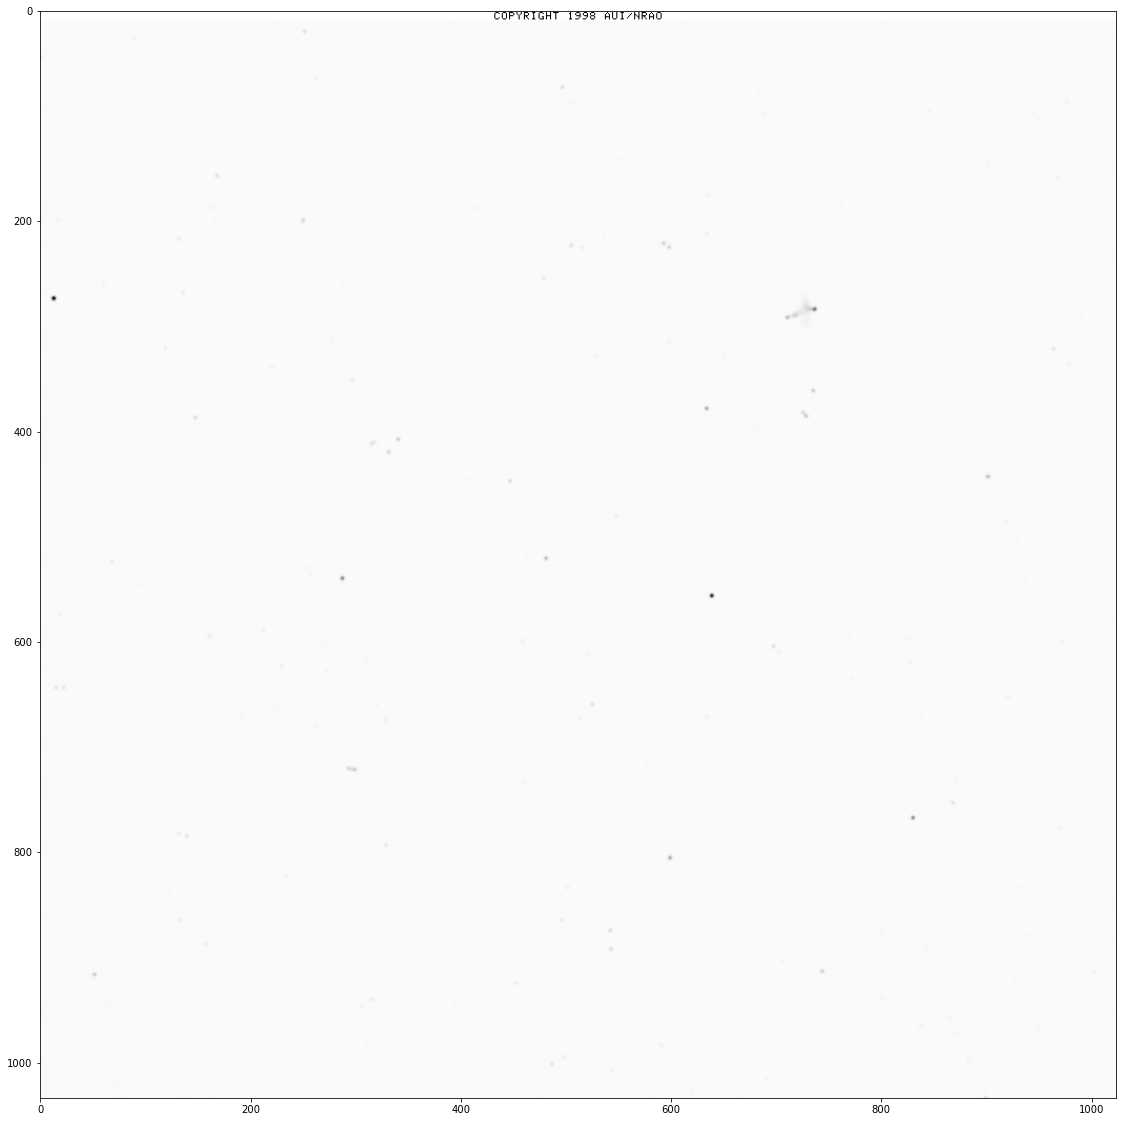

In [44]:
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

plt.figure(figsize=(20, 20))
plt.imshow(image_data[0][0][::-1], cmap=reversed_color_map)
#plt.colorbar()

In [3]:
image_0520p24 = fits.getdata('0520P24.fits', ext=0)
image_0520p28 = fits.getdata('0520P28.fits', ext=0)

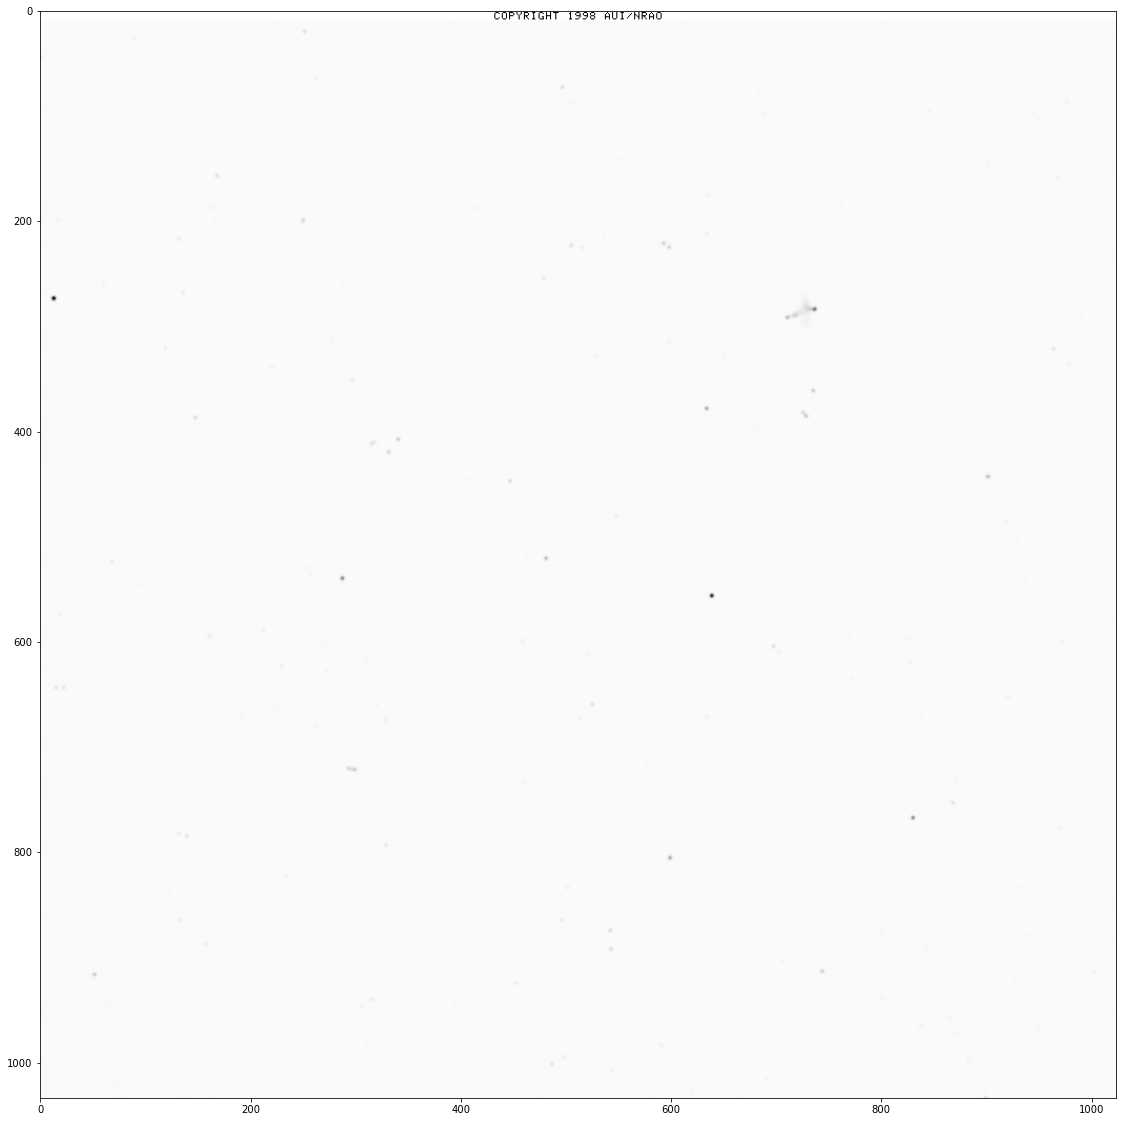

In [4]:
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

plt.figure(figsize=(20, 20))
plt.imshow(image_0520p24[0][0][::-1], cmap=reversed_color_map)
#plt.colorbar()

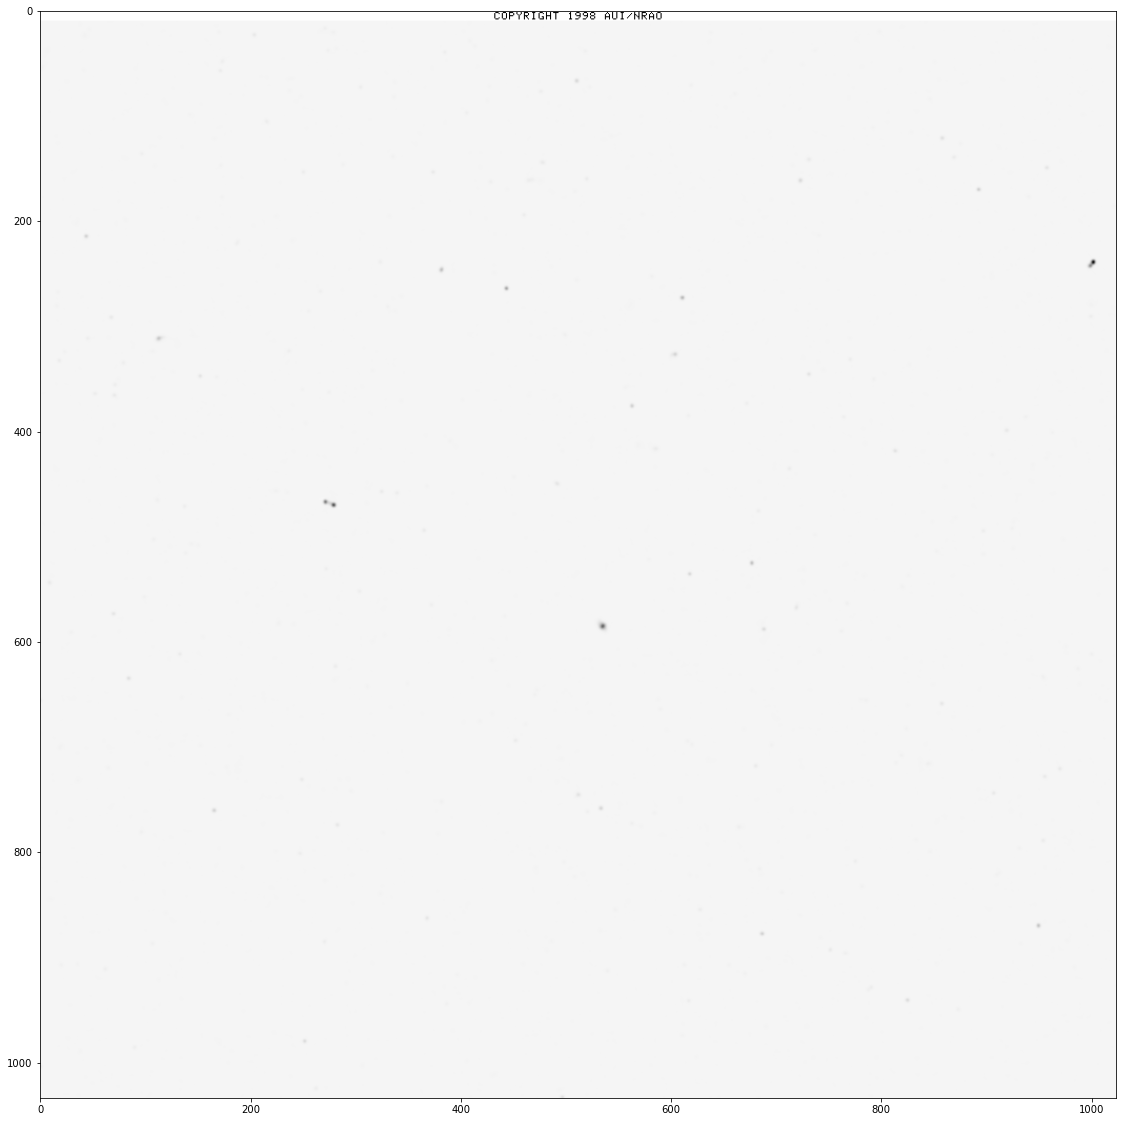

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(image_0520p28[0][0][::-1], cmap=reversed_color_map)
#plt.colorbar()

In [8]:
np.savetxt('test.txt', image_0520p28[0][0][::-1])

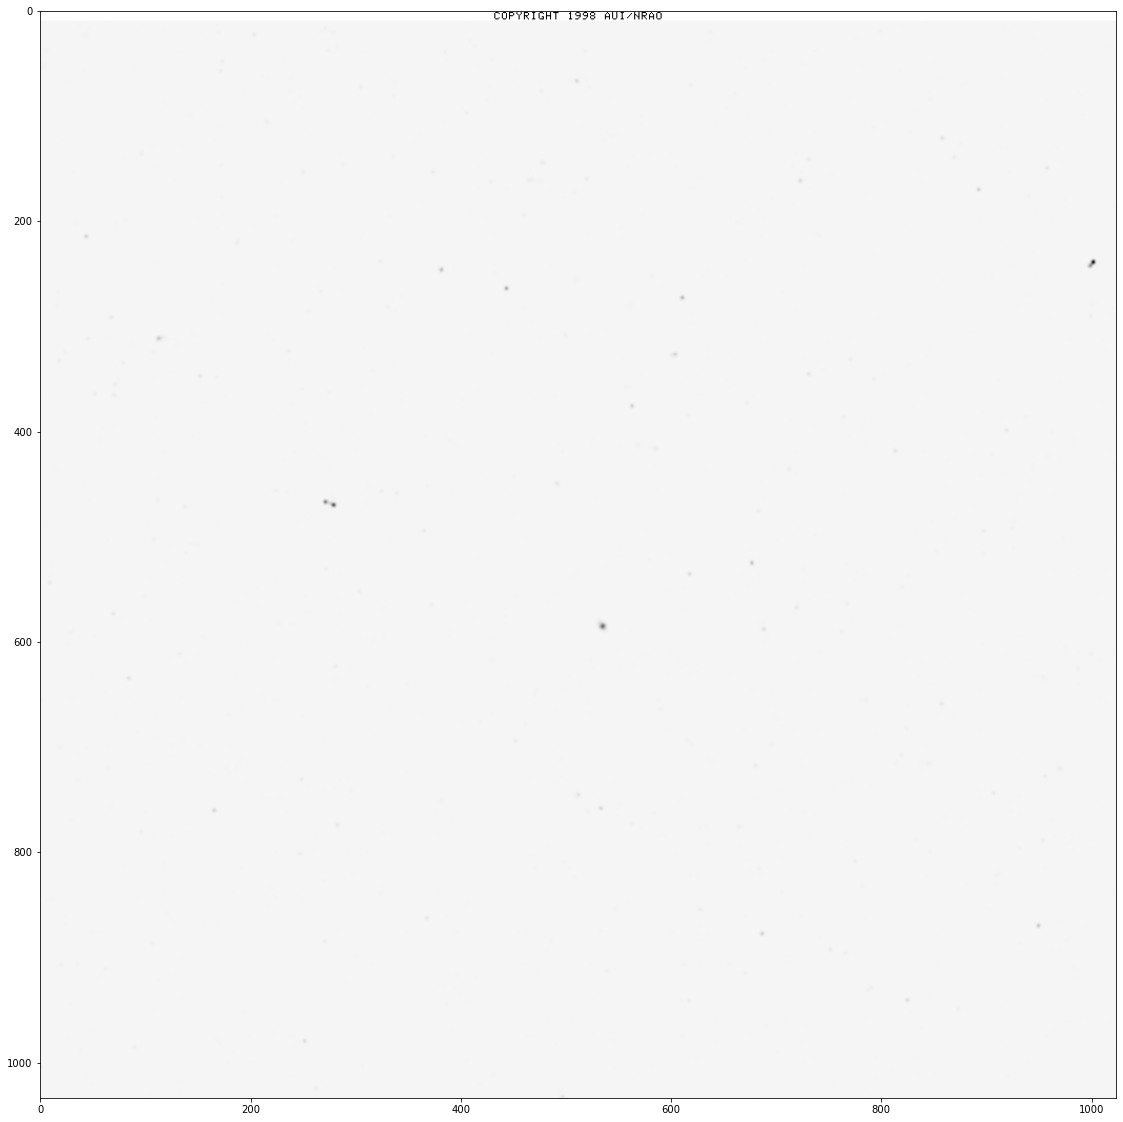

In [10]:
plt.figure(figsize=(20, 20))
plt.imshow(array2d, cmap=reversed_color_map)
#plt.colorbar()

In [36]:
files_images = glob.glob('data/*/*.txt')

In [38]:
image_1 = read_file(files_images[100])

In [40]:
image_2 = read_file(files_images[500])

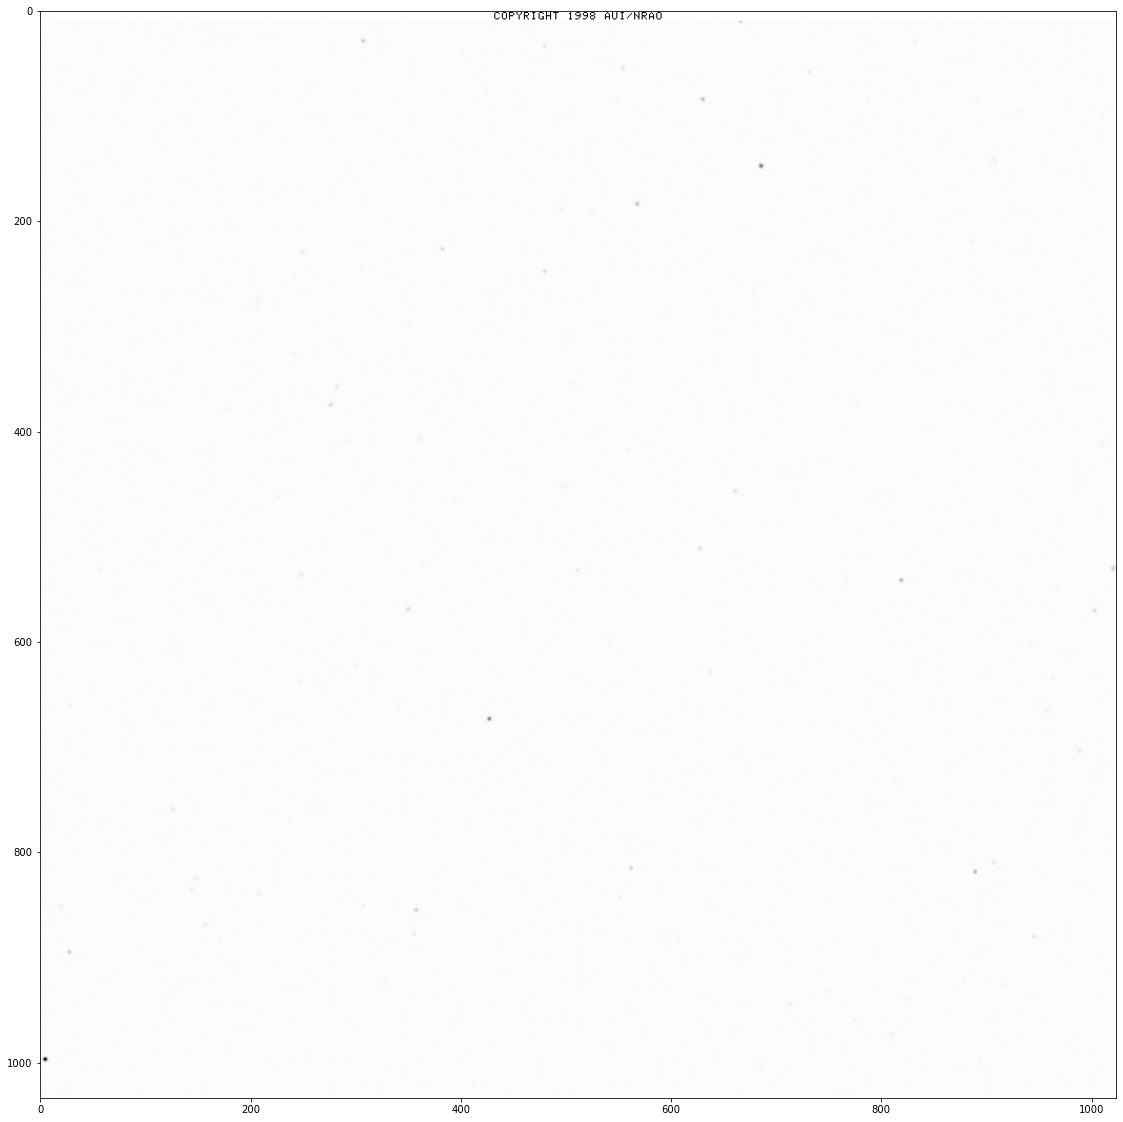

In [41]:
plt.figure(figsize=(20, 20))
plt.imshow(image_1, cmap=reversed_color_map)
#plt.colorbar()

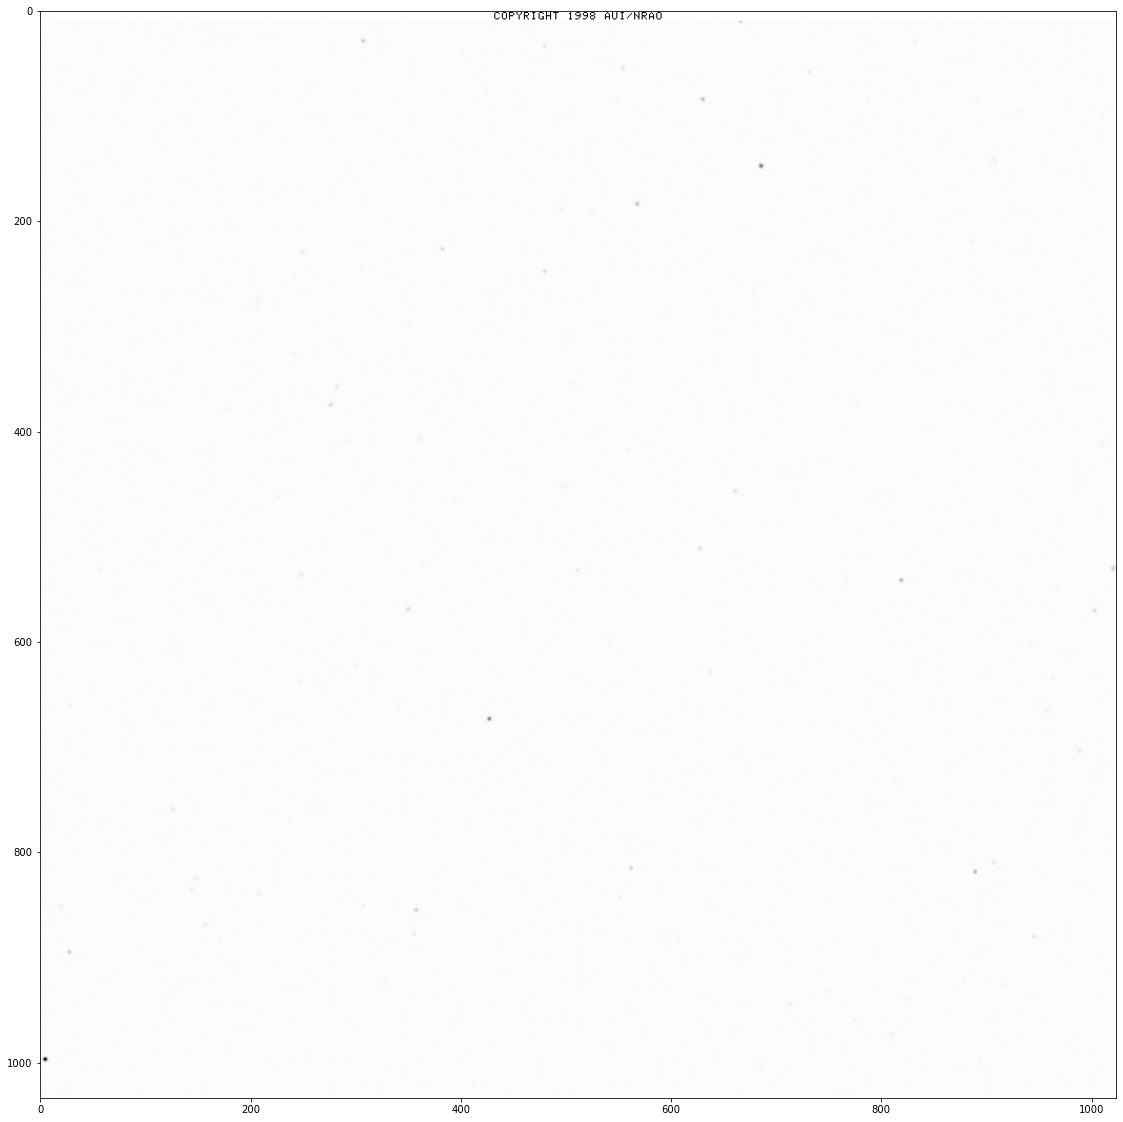

In [42]:
plt.figure(figsize=(20, 20))
plt.imshow(image_2, cmap=reversed_color_map)
#plt.colorbar()